# Backpropagation Lab





In [34]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import io
import requests
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.python.data.ops.dataset_ops import ShuffleDataset

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 10000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [35]:
#importing the data and getting it to DF
url = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

iris_df = pd.DataFrame(data)

iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


In [36]:
#Iris with no regularization
X = iris_df.drop(columns=['class'])
Y = iris_df['class']

X, y = make_classification(n_samples=150, random_state=1)
n_runs = 4
iterations_list = []
accuracy_list = []
test_set_accuracy_list = []

for i in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=i)
    clf = MLPClassifier(hidden_layer_sizes=64, activation = 'logistic', solver='sgd',
                        alpha=0, batch_size=1, learning_rate_init=0.1, shuffle=True,
                        momentum=0, n_iter_no_change=50, max_iter=10000)
    clf.fit(X_train, y_train)
    iterations_list.append(clf.n_iter_)
    accuracy_list.append(clf.score(X_train, y_train))
    test_set_accuracy_list.append(clf.score(X_test, y_test))

avg_iterations = np.mean(iterations_list)
avg_train_accuracy = np.mean(accuracy_list)

print(f"Average iterations until convergence: {avg_iterations}")
print(f"Average training set accuracy: {avg_train_accuracy}")
print(f"average test set accuracy: {np.mean(test_set_accuracy_list)}")


Average iterations until convergence: 122.25
Average training set accuracy: 1.0
average test set accuracy: 0.7687499999999999


#### Discussion
In the markdown cell below, write about your experience training the MLP classifier. Things to cover in your discussion: How long did it take? What was your accuracy on the training set? What was your accuracy on the testing set? Do you see any evidence of overfitting? If so, what could be done to reduce the effects of overfitting?

In total, it took almost 2 seconds for the model to run, on the training, it got 100% and on the test set it got 76%. I think that there is some evidence of overfitting because the training accuracy is so high and the test accuracy is lower. I think that to reduce the effects of overfitting, I could use early stopping or loss regularization or with messing around with a few of the other parameters that are available.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but this time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

In [37]:
#Iris with early stopping and validation scores graph
X, y = make_classification(n_samples=150, random_state=1)
n_runs = 4
iterations_list = []
accuracy_list = []
validation_scores_list = []
test_accuarcy_list = []
test_size = (0.2, 0.3, 0.6, 0.9)

for test_sizes in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sizes, random_state=1)
    clf = MLPClassifier(hidden_layer_sizes=64, activation = 'logistic', solver='sgd',
                        alpha=0, batch_size=1, learning_rate_init=0.1, shuffle=True,
                        momentum=0, n_iter_no_change=50, max_iter=10000,early_stopping=True, validation_fraction=0.1)
    clf.fit(X_train, y_train)
    validation_scores_list.append(clf.validation_scores_)
    iterations_list.append(clf.n_iter_)
    accuracy_list.append(clf.score(X_train, y_train))
    test_accuarcy_list.append(clf.score(X_test, y_test))

avg_iterations = np.mean(iterations_list)
avg_train_accuracy = np.mean(accuracy_list)
best_validation_score = max(validation_scores_list)
avg_test_accuracy = np.mean(test_accuarcy_list)


print(f"Average iterations until convergence: {avg_iterations}")
print(f"Average training set accuracy: {avg_train_accuracy}")
print(f"average test set accuracy: {avg_test_accuracy}")


Average iterations until convergence: 53.75
Average training set accuracy: 0.9035714285714287
average test set accuracy: 0.7342592592592593


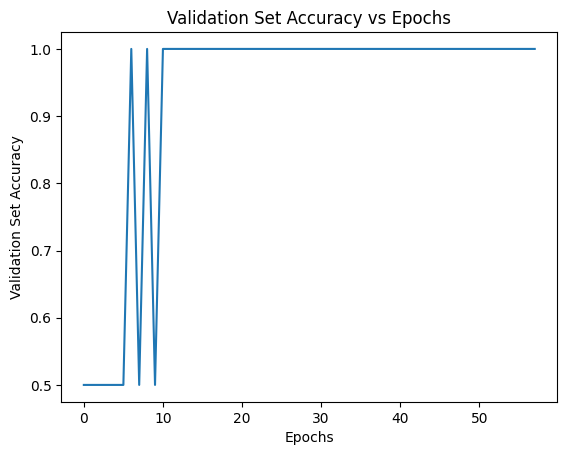

In [38]:
# Graph of validation scores vs epochs

X, y = make_classification(n_samples=150, random_state=1)
n_runs = 4
iterations_list = []
accuracy_list = []
validation_scores_list = []
test_accuarcy_list = []
test_size = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sizes, random_state=1)
clf = MLPClassifier(hidden_layer_sizes=64, activation = 'logistic', solver='sgd',
                        alpha=0, batch_size=1, learning_rate_init=0.1, shuffle=True,
                        momentum=0, n_iter_no_change=50, max_iter=10000,early_stopping=True, validation_fraction=0.1)
clf.fit(X_train, y_train)
validation_scores_list.append(clf.validation_scores_)

plt.plot(validation_scores_list[0])
plt.xlabel('Epochs')
plt.ylabel('Validation Set Accuracy')
plt.title('Validation Set Accuracy vs Epochs')
plt.show()

#### Discussion
Report on the average number of iterations until convergence. What is the effect of the use of the validation set and early stopping on training set accuracy and testing set accuracy? What do you attribute the performance change to? What do you see in the validation scores graph?

The average amount of iterations was ~54 until convergence. With early stopping and a validation set, we saw a slight decrease in training accuracy as well as a slight decrease in test accuarcy. It looks like according to the validation scores graph the model converged around 50 epochs. and after around 10 epochs, the accuracy began to platuae. I think that the performance change is due to the fact that we are using a validation set and early stopping, which helps to prevent overfitting.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [39]:
#Iris with Loss Regularization
X, y = make_classification(n_samples=150, random_state=1)
n_runs = 4
alpha_list = [.001, .01, .1, .00001]
iterations_list = []
accuracy_list = []
test_set_accuracy_list = []

for alpha in alpha_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=2)
    clf = MLPClassifier(hidden_layer_sizes=64, activation = 'logistic', solver='sgd',
                        alpha=alpha, batch_size=1, learning_rate_init=0.1, shuffle=True,
                        momentum=0, n_iter_no_change=50, max_iter=10000)
    clf.fit(X_train, y_train)
    iterations_list.append(clf.n_iter_)
    accuracy_list.append(clf.score(X_train, y_train))
    test_set_accuracy_list.append(clf.score(X_test, y_test))

avg_iterations = np.mean(iterations_list)
avg_train_accuracy = np.mean(accuracy_list)

print(f"Average iterations until convergence: {avg_iterations}")
print(f"Average training set accuracy: {avg_train_accuracy}")
print(f"average test set accuracy: {np.mean(test_set_accuracy_list)}")

Average iterations until convergence: 119.5
Average training set accuracy: 0.9416666666666667
average test set accuracy: 0.675


#### Discussion
Write about which regularization method gave you the best results and why you think that happened. Also compare: no regularization, early stopping, and L2 loss regularization.

Iterestingly enough, when looking at the test accuracy, no regularization seemed to have the best accuracy. I think that this is because the iris dataset is a very small and simple dataset, so it is not as prone to overfitting. I think that early stopping and L2 loss regularization are both good methods for preventing overfitting, but in this case, they did not improve the accuracy. I think that in general, early stopping is a good method for preventing overfitting, but it can also lead to underfitting if the validation set is too small or if the model is stopped too early. L2 loss regularization is also a good method for preventing overfitting, but it can also lead to underfitting if the regularization parameter is too high.

## 2 Hyperparameters 
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum. 

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great examples for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

In [40]:
#Load the dataset
url = "https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

vowels_df = pd.DataFrame(data)

vowels_df.head()
vowels_df.shape

(990, 14)

In [41]:
iris_df.shape

(150, 5)

In [42]:


# Baseline accuracies for Iris and Vowel datasets
iris_baseline_accuracy = 1 / len(iris_df['class'].unique())
vowel_baseline_accuracy = 1 / len(vowels_df['Class'].unique())
print(f"Iris baseline accuracy: {iris_baseline_accuracy}")
print(f"Vowel baseline accuracy: {vowel_baseline_accuracy}")

Iris baseline accuracy: 0.3333333333333333
Vowel baseline accuracy: 0.09090909090909091


In [43]:
vowels_df

,Train or Test,Speaker Number,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
0,b'Train',b'Andrew',b'Male',-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,b'hid'
1,b'Train',b'Andrew',b'Male',-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,b'hId'
2,b'Train',b'Andrew',b'Male',-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,b'hEd'
3,b'Train',b'Andrew',b'Male',-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,b'hAd'
4,b'Train',b'Andrew',b'Male',-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,b'hYd'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,b'Test',b'Wendy',b'Female',-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,b'hOd'
986,b'Test',b'Wendy',b'Female',-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,b'hod'
987,b'Test',b'Wendy',b'Female',-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,b'hUd'
988,b'Test',b'Wendy',b'Female',-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,b'hud'


I found the base accuracies to be .3 for the Iris dataset and .09 for the vowels dataset. I think that is because the vowels dataset is quite a bit larger than that of the Iris dataset. It also has more features. Looking at the features of the vowel dataset, I think that the features which are not vowels are not very useful for training, specifically the features which are binary (Male/Female). I think that the features which are binary are not very useful for training because they are not very informative.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [44]:
# Train with different learning rates
# Prepare data
vowels_df = vowels_df.drop(columns='Sex')
vowels_df = vowels_df.drop(columns='Speaker Number')
vowels_df = vowels_df.drop(columns='Train or Test')


X, y = make_classification(n_samples=150, random_state=1)
# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1, 10]

# Store results
results = []

for lr in learning_rates:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    clf = MLPClassifier(
        hidden_layer_sizes=64,
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=lr,
        shuffle=True,
        momentum=0,
        max_iter=1000,
        random_state=42
    )

    clf.fit(X_train, y_train)

    # metrics
    n_epochs = clf.n_iter_
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    results.append({
        'Learning Rate': lr,
        'Epochs': n_epochs,
        'Train Accuracy': f'{train_accuracy:.4f}',
        'Test Accuracy': f'{test_accuracy:.4f}',
        'Converged': 'Yes' if n_epochs < 1000 else 'No (may need more iterations)'
    })

results_df = pd.DataFrame(results)
results_df



,Learning Rate,Epochs,Train Accuracy,Test Accuracy,Converged
0,0.001,487,0.9196,0.9211,Yes
1,0.010,610,1.0000,0.9211,Yes
2,0.100,131,1.0000,0.9211,Yes
3,1.000,35,1.0000,0.8947,Yes
4,10.000,35,0.8839,0.7632,Yes


#### Discussion
Discuss your table and the effect of different learning rates on both training time and accuracy

With 64 hidden layers and using the different learning rates, it was interesting to see that the higher the learning rate, the lower the amount of epochs to convergence. What was also interesting to see was the the learning rates of .001, .010 and .100 all had the same Test accuracy but .010 and .100 had a right training accuacy and .100 had a perfect train accuarcy, a high Test accuracy and a lower amount of epochs.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy. 
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [45]:
# Train with different numbers of hidden nodes

hidden_nodes = 1
best_test_accuracy = 0.0
nodes_results = []

while True:
    clf = MLPClassifier(
        hidden_layer_sizes=(hidden_nodes,),
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=.100,
        shuffle=True,
        momentum=0,
        max_iter=1000,
        random_state=42
    )
    clf.fit(X_train, y_train)

    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    n_epochs = clf.n_iter_

    nodes_results.append({
        'Hidden Nodes': hidden_nodes,
        'Epochs': n_epochs,
        'Train Accuracy': f'{train_accuracy:.8}',
        'Test Accuracy': f'{test_accuracy:.8f}',
        'Converged': 'Yes' if n_epochs < 1000 else 'No (may need more iterations)'
    })

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        print(f"New best with {hidden_nodes} nodes: {test_accuracy:.8f}")
        hidden_nodes *= 2  # double for next loop iteration
    else:
        print(f"No improvement with {hidden_nodes} nodes, stopping.")
        break

nodes_results_df = pd.DataFrame(nodes_results)
nodes_results_df



New best with 1 nodes: 0.86842105
New best with 2 nodes: 0.89473684
No improvement with 4 nodes, stopping.


,Hidden Nodes,Epochs,Train Accuracy,Test Accuracy,Converged
0,1,181,0.98214286,0.86842105,Yes
1,2,147,0.98214286,0.89473684,Yes
2,4,188,0.98214286,0.86842105,Yes


#### Discussion
Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy

It was interesting that the train accuracy stated constant and the test accuracy initially increased from 1 hidden node to 2 hidden nodes but then decreased again to the same accuracy as 1 hidden node. The amount of epochs to convergence also seemed to ocilate from ~180 with 1 hidden node to ~140 with two nodes and then back to ~180 when we doubled to 4 hidden nodes. It makes me wonder if there is a sweet spot for the number node nodes that would both optimize accuracy and epochs to convergence. Based on the results I would have this sweet spot be 3 nodes.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [46]:
# Train with different momentum values
momentum_values = [.001, .01, .3, .4, .9]
best_test_accuracy = 0.0
nodes_results = []

for mom in momentum_values:
    clf = MLPClassifier(
        hidden_layer_sizes=4,
        activation='logistic',
        solver='sgd',
        alpha=0,
        batch_size=1,
        learning_rate_init=.100,
        shuffle=True,
        momentum=mom,
        max_iter=1000,
        random_state=42
    )
    clf.fit(X_train, y_train)

    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    n_epochs = clf.n_iter_

    nodes_results.append({
        'Momentum': mom,
        'Epochs': n_epochs,
        'Train Accuracy': f'{train_accuracy:.8}',
        'Test Accuracy': f'{test_accuracy:.8f}',
        'Converged': 'Yes' if n_epochs < 1000 else 'No (may need more iterations)'
    })

nodes_results_df = pd.DataFrame(nodes_results)
nodes_results_df


,Momentum,Epochs,Train Accuracy,Test Accuracy,Converged
0,0.001,188,0.98214286,0.86842105,Yes
1,0.010,188,0.98214286,0.86842105,Yes
2,0.300,123,0.98214286,0.86842105,Yes
3,0.400,106,0.98214286,0.86842105,Yes
4,0.900,31,0.98214286,0.89473684,Yes


#### Discussion
Discuss your table and the effect of momentum on both training time and accuracy

Looking at the results that I got from the different momentum values, it looks like it only affects the test accuracy which after reading the documentation makes sense as momentum is the gradient decent, this made sense even more when I looked at the epochs to convergence and saw that as the momentum got close to 1, the epochs to convergence decreased. Initially when choosing my values, I thought it would be interesting to use a value or two that were pretty close to 0 and a value that was close to 1, the other values being random. it was intersting to see that up until we got to .9 momentum, the test accuract was pretty much the same. After looking at the documentation again, I learned that the default value for momentum is .9.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html) 
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

#Y formatting
Y = np.array(Y)

if Y.ndim > 1 and Y.shape[1] > 1:
    Y = np.argmax(Y, axis=1)

# If Y contains bytes decode them
if Y.dtype.kind in {'S', 'O'}:
    try:
        Y = np.array([y.decode('utf-8') if isinstance(y, bytes) else y for y in Y])
    except Exception:
        pass

Y = Y.astype(str)


clf = MLPClassifier(
    activation='logistic',
    solver='sgd',
    alpha=0,
    early_stopping=True,
    n_iter_no_change=10,
    batch_size=1
)

parameters = {
    'learning_rate_init': [0.001, 0.05, 0.1],
    'hidden_layer_sizes': [(8,), (2,), (6,)],
    'momentum': [0.0, 0.2, 0.9]
}

grid = GridSearchCV(clf, parameters)
grid.fit(X, Y)

print(grid.best_params_)
print(grid.best_score_)


{'hidden_layer_sizes': (2,), 'learning_rate_init': 0.001, 'momentum': 0.9}
0.4066666666666666


In [49]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform
import numpy as np

# Fix Y formatting
Y = np.array(Y)
if Y.ndim > 1 and Y.shape[1] > 1:
    Y = np.argmax(Y, axis=1)
if Y.dtype.kind in {'S', 'O'}:
    try:
        Y = np.array([y.decode('utf-8') if isinstance(y, bytes) else y for y in Y])
    except Exception:
        pass
Y = Y.astype(str)

clf = MLPClassifier(
    activation='logistic',
    solver='sgd',
    alpha=0,
    early_stopping=True,
    n_iter_no_change=10,
    batch_size=1
)

distributions = dict(
    learning_rate_init=uniform(loc=0.001, scale=0.099),
    hidden_layer_sizes=[(8,), (2,), (6,)],
    momentum=uniform(loc=0.0, scale=0.9)
)

search = RandomizedSearchCV(clf, distributions, n_iter=10, random_state=42)
search.fit(X, Y)

print("Best Parameters:", search.best_params_)
print("Best Score:", search.best_score_)


Best Parameters: {'hidden_layer_sizes': (2,), 'learning_rate_init': 0.022021571957149343, 'momentum': 0.16364247048639055}
Best Score: 0.3733333333333333


#### Discussion
Write about and compare grid and randomized parameter search. How much time do they take? Which is more efficient or accurate? When should you use each?

Both ran fairly quickly, the grid search took slightly longer but not by much because it is a fairly small dataset. It was interesting that the grid search came to the same conclutions that I did but had a very bad test accuracy. The randomized search came up with different parameter evalues than I did and also had a very bad score. The grid search was more accurate. I think it really is a trade-off as to the computation time and the accuracy that you are wanting as to which one you should use when. On a small dataset like this, I think the grid search because it is more accurate but if you have a massive dataset and either not much time or not much computation power, I think the randomized search would be the better option.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also consider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [50]:
#!/bin/bash


In [51]:
url = "https://raw.githubusercontent.com/sethfrand/cars/refs/heads/main/dataset_54_vehicle.arff"
response = requests.get(url)
data, meta = arff.loadarff(io.StringIO(response.text))

cars_df = pd.DataFrame(data)

cars_df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,b'van'
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,b'van'
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,b'saab'
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,b'van'
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,b'bus'


In [52]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Convert
for col in cars_df.select_dtypes(['object']).columns:
    cars_df[col] = cars_df[col].str.decode('utf-8')

# Drop rows where COMPACTNESS is NA
cars_df = cars_df.dropna(subset=['COMPACTNESS'])

# Only numeric columns
numeric_df = cars_df.select_dtypes(include=['float64', 'int64'])
X = numeric_df.drop('COMPACTNESS', axis=1)
y = numeric_df['COMPACTNESS']

# Impute missing features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=5000,
                   random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))




Mean Squared Error: 9.451029131505447
R² Score: 0.8550859415692831


#### Discussion
Report on your choice of data set and your results. How does the MLPRegressor differ from the MLPClassifier? What are their respective uses? What lessons from above did you use?

I chose to do a dataset I found from openml on cars. I thought it would be interesting to see if I could predict the compactness of a car based on its other features. The MLPRegressor is used for regression problems where the output is a continuous value, while the MLPClassifier is used for classification problems where the output is a discrete value. I used the lessons from above on normalizing the input features and splitting the data into training and testing sets. I also used the MLPRegressor instead of the MLPClassifier and adjusted the hyperparameters accordingly.

### 3.2 (10%) - Other MLP Hyperparameters 
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required. 

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklearn does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [53]:
# Run with different hyperparameters

#tanh

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='tanh',
                   solver='adam',
                   max_iter=5000,
                   random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 9.85216007724299
R² Score: 0.8489353401374029


In [54]:

#logistic

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='logistic',
                   solver='adam',
                   max_iter=5000,
                   random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 8.992890070373287
R² Score: 0.8621106570526988


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=5000,
                   random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 9.451029131505447
R² Score: 0.8550859415692831


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='lbfgs',
                   max_iter=5000,
                   random_state=42,
                   learning_rate_init=.100
                   )
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 22.676241746775435
R² Score: 0.6523017572206089


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(128, 64),
                   activation='relu',
                   solver='lbfgs',
                   max_iter=500,
                   random_state=42,
                   learning_rate_init=.100
                   )
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 14.272753915538498
R² Score: 0.7811537065324727


/Users/sethfrandsen/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Discussion
How do the hyperparameters affect your accuracy? Specifically the number of layers and nodes and activation functions you experimented with. Do the solver, batch size, and learning rate adaptation affect anything?


Without running a too many tests for my computer to handle, it seems as though the different activation functions, batch sizes and layers each play a large role in the accuracy of the model. Interestingly enough, when I ran the last cell with a max iteration set to 5000, after 10 minutes and my computer almost overheating, it still had not converged. I started to run it again with a max iterations of 500 to see if that would then converge. When I ran it again, it maked out the iterations and I had an r^2 value of .78 and a MSE of 14.27. It seems like the logistic or tanh activation functions worked best for this dataset.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent 
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
